# Importing Libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Importing Data

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() # loading data set
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target #Convert into Dataframe

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Preprocessing

#### Data Exploration

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<font color='green'>The above steps gives a general information about the dataset</font>

#### Handing Missing values

In [13]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<font color='green'>As the dataframe doesn't contain any null values, we don't have to handle it. If null values were present, we would had to fill or drop such rows. While filling we can use values like mean, meadian, mode or some other appropriate value</font>

#### Remove Duplicate rows

In [15]:
df.duplicated().sum()

0

<font color='green'>As there is no duplicate rows, no need to remove anything</font>

#### Encoding Categorical Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<font color='green'>As there is no column of object datatype, no need to encode, which means no need to convert categorical columns into numerical form</font>

# Classification Algorithm Implementation

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df.iloc[:, :-1])  
y = df['target']

# Standard Scalar used to scale data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 1. Logistic Regression

<font color='red'>Logistic Regression is a supervised learning classification algorithm used to classify the categoricaloutcome. As here the target feature have values 0 and 1, this model can be used to classify the same</font>

In [46]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [89]:
y_predict_lr = model_lr.predict(x_test)
y_predict_lr

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

### 2. Decision Tree Classifier

<font color='red'>Decision Trees split the data recursively based on the features to make predictions. As they are robust to outliers itis suitable for this dataset</font>

In [52]:
#pre-pruning
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()  #model obj creation
#model.fit(x_train,y_train)
cv=GridSearchCV(model,parameter,scoring='accuracy')
cv.fit(x_train,y_train)


C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [53]:
best_model=cv.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [54]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=2,max_features='log2')  #model obj creation
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='log2')

[Text(0.5769230769230769, 0.875, 'x[26] <= -0.056\nentropy = 0.952\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3076923076923077, 0.625, 'x[0] <= 0.242\nentropy = 0.352\nsamples = 256\nvalue = [17, 239]'),
 Text(0.15384615384615385, 0.375, 'x[10] <= 0.795\nentropy = 0.099\nsamples = 233\nvalue = [3, 230]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.072\nsamples = 230\nvalue = [2, 228]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[10] <= 0.391\nentropy = 0.966\nsamples = 23\nvalue = [14, 9]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.971\nsamples = 15\nvalue = [6, 9]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8461538461538461, 0.625, 'x[22] <= 0.241\nentropy = 0.789\nsamples = 199\nvalue = [152, 47]'),
 Text(0.7692307692307693, 0.375, 'x[1] <= 0.223\nentropy = 0.965\nsamples = 77\nvalue = [30, 47]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.705\ns

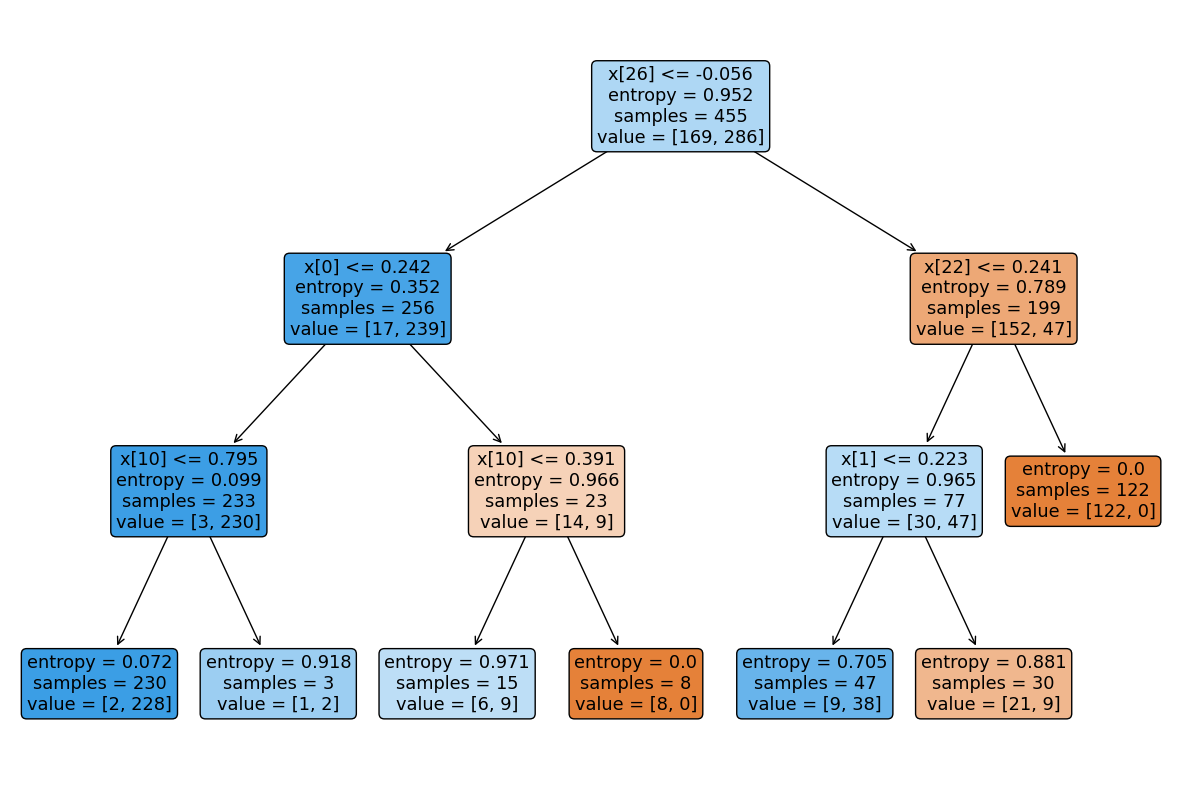

In [57]:
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)

In [60]:
#Post Pruning
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

[0.         0.09859024 0.17755356 0.40858992]


In [90]:
y_predict_dt = cv.predict(x_test)
y_predict_dt

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

### 3. Random Forest Classifier

<font color='red'>Random Forest is an ensemble of decision trees. It reduces overfitting by averaging the results from multiple trees and works well with most datasets.</font>

In [68]:

rf_model = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
rf_model.fit(x_train, y_train)

C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', random_state=0)

In [91]:
y_predict_rf = rf_model.predict(x_test)
y_predict_rf

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [71]:
ab_model = AdaBoostClassifier(n_estimators=100)
ab_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [92]:
y_predict_ab = ab_model.predict(x_test)
y_predict_ab

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [74]:
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [93]:
y_predict_gb = gb_model.predict(x_test)
y_predict_gb

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

### 4. Support Vector Machine (SVM)

<font color='red'>SVM finds the optimal hyperplane that separates classes in the feature space. It’s highly effective in high-dimensional spaces, making it a good candidate for this dataset.</font>

In [76]:
from sklearn.svm import SVC # "Support vector classifier"
svc_model = SVC(kernel = 'rbf', C = 3)
svc_model.fit(x_train, y_train)

SVC(C=3)

In [94]:
y_predict_svc = svc_model.predict(x_test)
y_predict_svc

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### 5. k-Nearest Neighbors (k-NN)

<font color='red'>k-NN classifies new data points based on the majority label of the k-nearest neighbors. It's simple but effective for datasets where distance between points is meaningful.</font>

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)


KNeighborsClassifier()

In [95]:
y_predict_knn = knn.predict(x_test)
y_predict_knn

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

# Model Comparison 

#### Accuracy Score

In [105]:
print('Accuracy of ')
accuracy_lr = accuracy_score(y_test, y_predict_lr)
print(f'Logistic regression: {accuracy_lr:.2f}')
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_dt = accuracy_score(y_test, y_predict_dt)
print(f'Decision tree: {accuracy_dt:.2f}')

accuracy_rf = accuracy_score(y_test, y_predict_rf)
print(f'Random forest: {accuracy_rf:.2f}')

accuracy_svc = accuracy_score(y_test, y_predict_svc)
print(f'Support Vector Machine: {accuracy_svc:.2f}')

accuracy_knn = accuracy_score(y_test, y_predict_knn)
print(f'k Nearest neighbour: {accuracy_knn:.2f}')


Accuracy of 
Logistic regression: 0.97
Decision tree: 0.92
Random forest: 0.96
Support Vector Machine: 0.98
k Nearest neighbour: 0.95


#### Precision Score

In [108]:
print('Precision Score of ')
precision_lr = precision_score(y_test, y_predict_lr)
print(f'Logistic regression: {precision_lr:.2f}')

precision_dt = precision_score(y_test, y_predict_dt)
print(f'Decision tree: {precision_dt:.2f}')

precision_rf = precision_score(y_test, y_predict_rf)
print(f'Random forest: {precision_rf:.2f}')

precision_svc = precision_score(y_test, y_predict_svc)
print(f'Support Vector Machine: {precision_svc:.2f}')

precision_knn = precision_score(y_test, y_predict_knn)
print(f'k Nearest neighbour: {precision_knn:.2f}')

Precision Score of 
Logistic regression: 0.97
Decision tree: 0.94
Random forest: 0.96
Support Vector Machine: 0.97
k Nearest neighbour: 0.96


#### Recall 

In [109]:
print('Recall of ')
recall_lr = recall_score(y_test, y_predict_lr)
print(f'Logistic regression: {recall_lr:.2f}')

recall_dt = recall_score(y_test, y_predict_dt)
print(f'Decision tree: {recall_dt:.2f}')

recall_rf = recall_score(y_test, y_predict_rf)
print(f'Random forest: {recall_rf:.2f}')

recall_svc = recall_score(y_test, y_predict_svc)
print(f'Support Vector Machine: {recall_svc:.2f}')

recall_knn = recall_score(y_test, y_predict_knn)
print(f'k Nearest neighbour: {recall_knn:.2f}')

Recall of 
Logistic regression: 0.99
Decision tree: 0.93
Random forest: 0.99
Support Vector Machine: 1.00
k Nearest neighbour: 0.96


#### F1 Score

In [110]:
print('F1 Score of ')
f1_lr = f1_score(y_test, y_predict_lr)
print(f'Logistic regression: {f1_lr:.2f}')

f1_dt = f1_score(y_test, y_predict_dt)
print(f'Decision tree: {f1_dt:.2f}')

f1_rf = f1_score(y_test, y_predict_rf)
print(f'Random forest: {f1_rf:.2f}')

f1_svc = f1_score(y_test, y_predict_svc)
print(f'Support Vector Machine: {f1_svc:.2f}')

f1_knn = f1_score(y_test, y_predict_knn)
print(f'k Nearest neighbour: {f1_knn:.2f}')

F1 Score of 
Logistic regression: 0.98
Decision tree: 0.94
Random forest: 0.97
Support Vector Machine: 0.99
k Nearest neighbour: 0.96


### Conclusion

Based on all the model comparison scores <font color='red'>SVM is the best performing algorithm</font> and <font color='red'>Decision Tree is the worst performing algorithm</font>

This concludes the analysis of classification algorithms on the breast cancer dataset.